In [1]:
# 시각화 모듈
import matplotlib.pyplot as plt

In [2]:
# STEP 1. 나눔 폰트 설치 (Nanum)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [3]:
# STEP 3. matplotlib의 폰트를 Nanum 폰트로 지정

plt.rc('font', family='NanumBarunGothic')

# **문제1) 가장 무더웠던 날이 언제이며, 이날의 평균 기온, 평균 풍속, 최대 풍속을 구하시오.**
-----

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mat

In [5]:
#코랩에서 데이터 파일을 사용하기 위해 직접 업로드하는 코드
from google.colab import files
file_uploaded=files.upload()

Saving weather.csv to weather (1).csv


In [6]:
# 파일 읽기
df = pd.read_csv('weather.csv', encoding = 'CP949') # CP949(확장 완성형), MS
df

,일시,평균기온,최대풍속,평균풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


In [7]:
# 전체 행과 열, 속성 파악
df.shape

(3653, 4)

In [8]:
df.head()

,일시,평균기온,최대풍속,평균풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3653 non-null   object 
 1   평균기온    3653 non-null   float64
 2   최대풍속    3649 non-null   float64
 3   평균풍속    3647 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


In [10]:
# 데이터프레임 통계, 문자 빼고
df.describe()

,평균기온,최대풍속,평균풍속
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


In [11]:
# 데이터 결측치
df.isnull().sum()
# df['최대풍속'].isnull().sum()

일시      0
평균기온    0
최대풍속    4
평균풍속    6
dtype: int64

In [12]:
# 평균 풍속 최솟값
print("평균풍속의 최솟값은",df['평균풍속'].min(), "m/s 입니다.")

평균풍속의 최솟값은 0.2 m/s 입니다.


In [13]:
# 결측치 제거 (null 제거)

df2 = df.dropna(how = 'any')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3646 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3646 non-null   object 
 1   평균기온    3646 non-null   float64
 2   최대풍속    3646 non-null   float64
 3   평균풍속    3646 non-null   float64
dtypes: float64(3), object(1)
memory usage: 142.4+ KB


In [14]:
# 가장 무더웠던 날!!!
hot = df2['평균기온'].max() 
hot

31.3

In [15]:
hotday = df2['일시'][df2['평균기온'] == hot]
hotday

1103    2013-08-08
Name: 일시, dtype: object

In [16]:
hotday = df2['일시'][df2['평균기온'] == hot]
hotday
type(hotday)

pandas.core.series.Series

In [17]:
print(f'가장 더웠던 날은 {hotday[1103]}로 {hot}도 입니다.')

가장 더웠던 날은 2013-08-08로 31.3도 입니다.


In [18]:
hotday2=str(hotday)
hotday2

# hotday2=hotday2[8:18]

'1103    2013-08-08\nName: 일시, dtype: object'

In [19]:
hotday2=str(hotday)
hotday2=hotday2[8:18]

In [20]:
print(f'가장 더웠던 날은 {hotday2}로 {hot}도 입니다.')

가장 더웠던 날은 2013-08-08로 31.3도 입니다.


In [21]:
hottest=df2.loc[df2['평균기온']==hot]
print("가장 무더웠던 날")
print("=" * 50)
hottest

가장 무더웠던 날


,일시,평균기온,최대풍속,평균풍속
1103,2013-08-08,31.3,7.8,4.6


# **문제2) 울릉도의 평균기온이 30도가 넘는 날을 찾아, 이날의 기상데이터를 나열 해보시오.**
-----

In [22]:
hottest=df2.loc[df2['평균기온']>=30]
print("평균기온이 30도가 넘는날")
print("=" * 50)
hottest

평균기온이 30도가 넘는날


,일시,평균기온,최대풍속,평균풍속
1103,2013-08-08,31.3,7.8,4.6
1104,2013-08-09,30.6,9.9,6.4
1105,2013-08-10,30.6,7.4,3.8
2913,2018-07-23,30.5,6.5,1.6
2925,2018-08-04,30.3,5.8,3.0


# **문제3) 울릉도는 몇 월에 바람이 가장 강할까? (막대그래프 출력)**
-----

In [23]:
#슬라이싱을 이용하여 월을 잘라내어, 기존 데이터프레임에 컬럼을 추가
#월별로 데이터를 다시 분류하기 위해 '월' 속성을 부여

df2['일시'].str[5:7] #월
df2['일시'].str[8:] #일

df2['월'] = df2['일시'].str[5:7] #월 필드 추가
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,일시,평균기온,최대풍속,평균풍속,월
0,2010-08-01,28.7,8.3,3.4,08
1,2010-08-02,25.2,8.7,3.8,08
2,2010-08-03,22.1,6.3,2.9,08
3,2010-08-04,25.3,6.6,4.2,08
4,2010-08-05,27.2,9.1,5.6,08
...,...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7,07
3649,2020-07-28,21.9,4.5,1.6,07
3650,2020-07-29,21.6,3.2,1.0,07
3651,2020-07-30,22.9,9.7,2.4,07


In [24]:
#월별로 묶기
df2.groupby('월')['평균풍속'].mean()

월
01    3.757419
02    3.946786
03    4.390291
04    4.630303
05    4.219355
06    3.461000
07    3.877419
08    3.596129
09    3.661667
10    3.961613
11    3.930667
12    3.817097
Name: 평균풍속, dtype: float64

In [25]:
re = df2.groupby('월')['평균풍속'].mean()
re

월
01    3.757419
02    3.946786
03    4.390291
04    4.630303
05    4.219355
06    3.461000
07    3.877419
08    3.596129
09    3.661667
10    3.961613
11    3.930667
12    3.817097
Name: 평균풍속, dtype: float64

In [26]:
type(re)

pandas.core.series.Series

In [27]:
#문제3) 울릉도는 몇 월에 바람이 가장 강할까?
re[re == re.max()]
re

re2 = re.index[re == re.max()].tolist() #tolist(), index를 목록 반환하기 위해서 (기본 : Int64Index)
print(f'울릉도는 {re2[0]}월에 가장 바람이 강합니다.')

울릉도는 04월에 가장 바람이 강합니다.


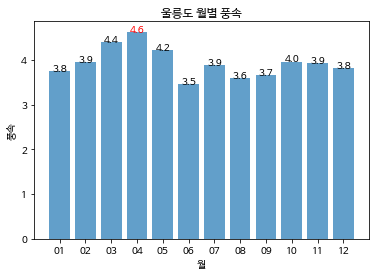

In [39]:
#x : 월
#y : 평균 풍속
#막대그래프 출력, 자료구조 변환

y = re.tolist()
x = re.index.tolist()

plt.bar(x, y, align="center", alpha=0.7)
plt.title('울릉도 월별 풍속')
plt.xlabel('월')
plt.ylabel('풍속')

for i in range(0, len(x)):
  if y[i] == max(y):
    plt.text(i, y[i], round(y[i], 1), ha='center', color='r')
  else:
    plt.text(i, y[i], round(y[i], 1), ha='center')

plt.show()